In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def dist2D(pos1, pos2):
    return np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)

In [4]:
# distances analysis function:
def dist_analysis(traj, trajCM, Nfish, max_time):
    min_dists, max_dists, max_dists_to_CM = [], [], []
    for t in range(max_time):
        dists = []
        dists_to_CM = []
        for f in range(Nfish-1):
            dists_to_CM.append(dist2D(traj['trajectories'][t,f,:], trajCM[t,:]))
            for g in range(f+1,Nfish):
                d = dist2D(traj['trajectories'][t,f,:], traj['trajectories'][t,g,:])
                dists.append(d)
        min_dists.append(min(dists))
        max_dists.append(max(dists))
        dists_to_CM.append(dist2D(traj['trajectories'][t,Nfish-1,:], trajCM[t,:]))
        max_dists_to_CM.append(max(dists_to_CM))
    return min_dists, max_dists, max_dists_to_CM

In [6]:
N = 8
vids = ['20221104_0050.npy', '20221104_0051.npy', '20221107_0052.npy', '20221107_0053.npy']

In [7]:
min_dists_all_vid = []
max_dists_to_CM_all_vid = []
for vid in vids:
    traj = np.load(f'{vid}', allow_pickle=True).item()
    lenFrames = traj['trajectories'].shape[0]
    Nfish = traj['trajectories'].shape[1]
    if Nfish != 8:
        print(f'Something is wrong with video {vid}. Nfish = {Nfish} while N = {N}')
    # traj of the center of mass:
    trajCM = np.sum(traj['trajectories'], axis=1)/Nfish
    min_dists, max_dists, max_dists_to_CM = dist_analysis(traj, trajCM, Nfish, lenFrames)
    min_dists_all_vid.append(min_dists), max_dists_to_CM_all_vid.append(max_dists_to_CM)

In [10]:
for i,vid in enumerate(vids):
    print(f'{vid} Average minimum distance bt fish: {np.average(min_dists_all_vid[i])}')
    print(f'{vid} Absolute minimum distance bt fish: {min(min_dists_all_vid[i])}')
    print(f'{vid} Average maximum distance to CM: {np.average(max_dists_to_CM_all_vid[i])}')
    print('----------------------------------------------------------')

20221104_0050.npy Average minimum distance bt fish: 69.29803631436961
20221104_0050.npy Absolute minimum distance bt fish: 0.0
20221104_0050.npy Average maximum distance to CM: 274.4578090066115
----------------------------------------------------------
20221104_0051.npy Average minimum distance bt fish: 91.99973515082236
20221104_0051.npy Absolute minimum distance bt fish: 0.3319327425231726
20221104_0051.npy Average maximum distance to CM: 379.3947211695722
----------------------------------------------------------
20221107_0052.npy Average minimum distance bt fish: 87.59939607558405
20221107_0052.npy Absolute minimum distance bt fish: 0.0
20221107_0052.npy Average maximum distance to CM: 324.9461150328104
----------------------------------------------------------
20221107_0053.npy Average minimum distance bt fish: 105.3958461470161
20221107_0053.npy Absolute minimum distance bt fish: 0.0
20221107_0053.npy Average maximum distance to CM: 447.219926778853
-----------------------------

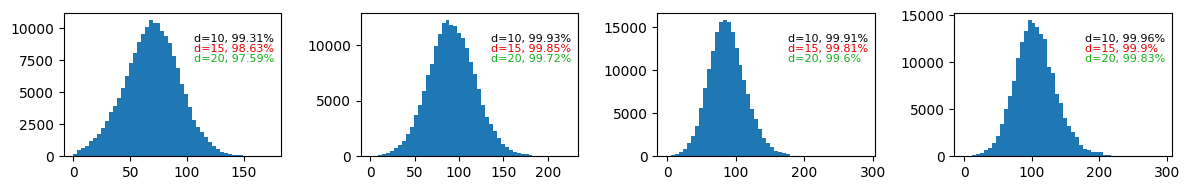

In [20]:
# tentative box distance:
boxDists = [10, 15, 20]
colors = ['xkcd:black', 'xkcd:red', 'xkcd:green']
fig, ax = plt.subplots(1,4, figsize=(12,2), tight_layout=True)
# fig, ax = plt.subplots(2,4, figsize=(12,4), tight_layout=True)
for i in range(len(vids)):
    ax[i].hist(min_dists_all_vid[i], 50)
    for j,d in enumerate(boxDists):
        min_dists = np.array(min_dists_all_vid[i])
        min_dists_ab_d = min_dists[min_dists > d]
        p = round(100*len(min_dists_ab_d)/len(min_dists),2)
        ax[i].text(0.6,0.8-j*0.07, f'd={d}, {p}%', color=colors[j], fontsize=8, transform=ax[i].transAxes)
    # ax[0,i].hist(min_dists_all_vid[i], 50)
    # ax[1,i].hist(min_dists_all_vid[i], 50, cumulative=True)